In [1]:
import os
import glob
import pandas as pd

In [46]:
import os
import pandas as pd

# List of file paths containing the CSV files
file_paths = [
    r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2020.csv",
    r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2021.csv",
    r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2022.csv",
    r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2023.csv",
    r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2024.csv"
]

# Output folder for cleaned files
output_folder = r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO"
os.makedirs(output_folder, exist_ok=True)

# Function to determine day period based on the hour
def get_day_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Process each file
for file_path in file_paths:
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)

        # Convert 'started_at' and 'ended_at' to datetime after removing milliseconds
        df['started_at'] = df['started_at'].astype(str).str.split('.').str[0]
        df['ended_at'] = df['ended_at'].astype(str).str.split('.').str[0]
        df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
        df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

        # Apply transformations
        df['day_period'] = df['started_at'].dt.hour.apply(get_day_period)
        df['month_name'] = df['started_at'].dt.strftime('%B')
        df['season'] = df['started_at'].dt.month.apply(get_season)
        df['weekday'] = df['started_at'].dt.day_name()
        df['week_type'] = df['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
        
        # Calculate ride duration in seconds
        df['duration_seconds'] = (df['ended_at'] - df['started_at']).dt.total_seconds()
        
        # Convert duration to minutes
        df['duration_minutes'] = df['duration_seconds'].apply(lambda x: f"{int(x // 60)}.{int(x % 60):02d}").astype(float)
        
        # Extract hours and minutes for decimal representation
        df['total_hours'] = df['duration_seconds'] // 3600

        print(f"\nData Cleaning & Transformation Completed for {file_path}!")
        
        # Save the cleaned file
        output_file_path = os.path.join(output_folder, f"cleaned_{os.path.basename(file_path)}")
        df.to_csv(output_file_path, index=False)  # <-- Corrected to save `df`
        print(f"Cleaned file saved: {output_file_path}\n")



Data Cleaning & Transformation Completed for C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2020.csv!
Cleaned file saved: C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO\cleaned_cleaned_cyclistic_data_2020.csv


Data Cleaning & Transformation Completed for C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2021.csv!
Cleaned file saved: C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO\cleaned_cleaned_cyclistic_data_2021.csv


Data Cleaning & Transformation Completed for C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2022.csv!
Cleaned file saved: C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO\cleaned_cleaned_cyclistic_data_2022.csv


Data Cleaning & Transformation Completed for C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\cleaned_cyclistic_data_2023.csv!
Cleaned file saved: C

In [72]:
# _2020= pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO\cleaned_cleaned_cyclistic_data_2020.csv")
# _2020 = _2020[_2020['duration_minutes'] > 0]
#_2020.to_csv("final_2020.csv")

In [78]:
# _2021= pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO\cleaned_cleaned_cyclistic_data_2021.csv")
# _2021 = _2021[_2021['duration_minutes'] > 0]
#_2021.to_csv("final_2021.csv")

In [82]:
#_2022= pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO\cleaned_cleaned_cyclistic_data_2022.csv")
#_2022 = _2022[_2022['duration_minutes'] > 0]
#_2022.to_csv("final_2022.csv")

In [84]:
#_2023 = pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO\cleaned_cleaned_cyclistic_data_2023.csv")
#_2023 = _2023[_2023['duration_minutes'] > 0]
#_2023.to_csv("final_2023.csv")

In [86]:
#_2024 = pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\DATA_CHICAGO\cleaned_cleaned_cyclistic_data_2024.csv")
#_2024 = _2024[_2024['duration_minutes'] > 0]
#_2024.to_csv("final_2024.csv")

In [79]:
#_2020[_2020['duration_minutes']<0]

In [3]:
_2020 = pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\final_2020.csv")

In [4]:
_2021 = pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\final_2021.csv")

In [5]:
_2022 = pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\final_2022.csv")

In [6]:
_2023 = pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\final_2023.csv")

In [7]:
_2024 = pd.read_csv(r"C:\Users\Sowjanya\Documents\BIIKE-SHARE-DATA\all_files_Cyclist\final_2024.csv")

In [ ]:
years = [2020, 2021, 2022, 2023, 2024]
dataframes = [_2020, _2021, _2022, _2023, _2024]

winter_counts = {}

for i in range(len(years)):
    if dataframes[i].empty:
        print(f"No data for {years[i]}")
        continue
    
    # Standardize month column format
    dataframes[i]['month_name'] = dataframes[i]['month_name'].str.strip().str.title()
    
    # Identify December of the previous year and Jan-Feb of the current year
    if i > 0:
        winter_df = pd.concat([
            dataframes[i - 1][dataframes[i - 1]['month_name'] == 'December'],  # December of last year
            dataframes[i][dataframes[i]['month_name'].isin(['January', 'February'])]  # Jan, Feb of current year
        ])
    else:
        # Only use December for 2020 (no previous year data)
        winter_df = dataframes[i][dataframes[i]['month_name'] == 'December']
    
    # Count rides for winter season
    winter_counts[years[i]] = winter_df['ride_id'].count()

# Print winter ride counts
for year, count in winter_counts.items():
    print(f"Winter {year} Ride Count: {count}")

# Uni-variate Analysis:

In [41]:
_2020.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'ride_validity', 'day_period',
       'month_name', 'season', 'weekday', 'week_type', 'duration_seconds',
       'duration_minutes', 'total_hours'],
      dtype='object')

In [13]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    no_of_riders = df['ride_id'].count()  # Count unique end stations
    print(year,no_of_riders)

2020 3099686
2021 5589640
2022 5661328
2023 5711618
2024 5852613


In [90]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    rides_typeof_bikes = df['rideable_type'].value_counts() 
    print(f"Year {year}: {rides_typeof_bikes} Count of Type of bikes")

Year 2020: rideable_type
docked_bike      2524683
electric_bike     504467
classic_bike       70536
Name: count, dtype: int64 Count of Type of bikes
Year 2021: rideable_type
classic_bike     3246270
electric_bike    2031329
docked_bike       312041
Name: count, dtype: int64 Count of Type of bikes
Year 2022: rideable_type
electric_bike    2888630
classic_bike     2597846
docked_bike       174852
Name: count, dtype: int64 Count of Type of bikes
Year 2023: rideable_type
electric_bike    2944490
classic_bike     2691004
docked_bike        76124
Name: count, dtype: int64 Count of Type of bikes
Year 2024: rideable_type
electric_bike       2979950
classic_bike        2728326
electric_scooter     144337
Name: count, dtype: int64 Count of Type of bikes


In [91]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    unique_stations = df['end_station_name'].nunique()  # Count unique end stations
    print(f"Year {year}: {unique_stations} unique end stations")

Year 2020: 692 unique end stations
Year 2021: 844 unique end stations
Year 2022: 1692 unique end stations
Year 2023: 1597 unique end stations
Year 2024: 1815 unique end stations


In [92]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    unique_stations = df['start_station_name'].nunique()  # Count unique end stations
    print(f"Year {year}: {unique_stations} unique start stations")

Year 2020: 692 unique start stations
Year 2021: 847 unique start stations
Year 2022: 1674 unique start stations
Year 2023: 1591 unique start stations
Year 2024: 1808 unique start stations


In [94]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    Type_of_rider = df['member_casual'].value_counts() 
    print(f"Year {year}: {Type_of_rider} Count of Type of riders(casual/annual)")

Year 2020: member_casual
member    1786974
casual    1312712
Name: count, dtype: int64 Count of Type of riders(casual/annual)
Year 2021: member_casual
member    3064466
casual    2525174
Name: count, dtype: int64 Count of Type of riders(casual/annual)
Year 2022: member_casual
member    3344728
casual    2316600
Name: count, dtype: int64 Count of Type of riders(casual/annual)
Year 2023: member_casual
member    3658869
casual    2052749
Name: count, dtype: int64 Count of Type of riders(casual/annual)
Year 2024: member_casual
member    3707097
casual    2145516
Name: count, dtype: int64 Count of Type of riders(casual/annual)


In [95]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    rides_validity = df['ride_validity'].value_counts() 
    print(f"Year {year}: {rides_validity} count based on ride validity")

Year 2020: ride_validity
Fair          3027274
Suspicious      72412
Name: count, dtype: int64 count based on ride validity
Year 2021: ride_validity
Fair          5430716
Suspicious     158924
Name: count, dtype: int64 count based on ride validity
Year 2022: ride_validity
Fair          5439618
Suspicious     221710
Name: count, dtype: int64 count based on ride validity
Year 2023: ride_validity
Fair          5449598
Suspicious     262020
Name: count, dtype: int64 count based on ride validity
Year 2024: ride_validity
Fair          5611665
Suspicious     240948
Name: count, dtype: int64 count based on ride validity


In [96]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    avg_min = df['duration_minutes'].mean()
    print(f"Year {year}: {avg_min} average duration in minutes")

Year 2020: 28.192072974488347 average duration in minutes
Year 2021: 20.788258825255298 average duration in minutes
Year 2022: 16.135777965876567 average duration in minutes
Year 2023: 14.967004678884342 average duration in minutes
Year 2024: 15.292013493801841 average duration in minutes


In [97]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    least_min = df['duration'].min()
    print(f"Year {year}: {least_min} minimum duration in minutes")

Year 2020: 1 minimum duration in minutes
Year 2021: 1 minimum duration in minutes
Year 2022: 1 minimum duration in minutes
Year 2023: 1 minimum duration in minutes
Year 2024: 1 minimum duration in minutes


In [98]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    max_min = df['duration_minutes'].max()
    print(f"Year {year}: {max_min} maximun duration in minutes")
# 

Year 2020: 58720.02 maximun duration in minutes
Year 2021: 55944.09 maximun duration in minutes
Year 2022: 34354.04 maximun duration in minutes
Year 2023: 12136.18 maximun duration in minutes
Year 2024: 1509.22 maximun duration in minutes


In [99]:
_2020.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'ride_validity', 'day_period',
       'month_name', 'season', 'weekday', 'week_type', 'duration_seconds',
       'duration_minutes', 'total_hours'],
      dtype='object')

In [55]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    ride_duration_comparison = df.groupby('member_casual')['duration_minutes'].agg(['mean', 'median', 'max', 'min'])
    print(year ,ride_duration_comparison)

2020                     mean  median       max   min
member_casual                                   
casual         44.789176   21.32  55683.53  0.01
member         15.999833   11.47  58720.02  0.01
2021                     mean  median       max   min
member_casual                                   
casual         30.045601   15.57  55944.09  0.01
member         13.160046    9.36   1499.56  0.01
2022                     mean  median       max   min
member_casual                                   
casual         21.793488   12.58  34354.04  0.01
member         12.217178    8.50   1499.56  0.01
2023                     mean  median       max   min
member_casual                                   
casual         20.468361   11.49  12136.18  0.01
member         11.880558    8.31   1499.56  0.01
2024                     mean  median      max   min
member_casual                                  
casual         20.917447   12.01  1509.22  0.01
member         12.036243    8.41  1499.56  0.01

# Bi-variate Analysis : 

In [115]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    a = df.value_counts(['rideable_type', 'member_casual'])
    print(f"Year {year}: {a} based on casual and Annual riders different type of bikes ")

Year 2020: rideable_type  member_casual
docked_bike    member           1432357
               casual           1092326
electric_bike  member            295369
               casual            209098
classic_bike   member             59248
               casual             11288
Name: count, dtype: int64 based on casual and Annual riders different type of bikes 
Year 2021: rideable_type  member_casual
classic_bike   member           1982939
               casual           1263331
electric_bike  member           1081526
               casual            949803
docked_bike    casual            312040
               member                 1
Name: count, dtype: int64 based on casual and Annual riders different type of bikes 
Year 2022: rideable_type  member_casual
classic_bike   member           1708993
electric_bike  member           1635735
               casual           1252895
classic_bike   casual            888853
docked_bike    casual            174852
Name: count, dtype: int64 base

In [133]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    avg_duration = df.groupby("member_casual")["duration_minutes"].mean()
    print(year,avg_duration)

2020 member_casual
casual    44.789176
member    15.999833
Name: duration_minutes, dtype: float64
2021 member_casual
casual    30.045601
member    13.160046
Name: duration_minutes, dtype: float64
2022 member_casual
casual    21.793488
member    12.217178
Name: duration_minutes, dtype: float64
2023 member_casual
casual    20.468361
member    11.880558
Name: duration_minutes, dtype: float64
2024 member_casual
casual    20.917447
member    12.036243
Name: duration_minutes, dtype: float64


In [144]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    top_stations_casual = df[df["member_casual"] == "casual"]["start_station_name"].value_counts().head(5)
    print(year,top_stations_casual)

2020 start_station_name
Streeter Dr & Grand Ave       24676
Lake Shore Dr & Monroe St     18929
Millennium Park               17810
Theater on the Lake           14294
Lake Shore Dr & North Blvd    12968
Name: count, dtype: int64
2021 start_station_name
Streeter Dr & Grand Ave    66269
Millennium Park            33498
Michigan Ave & Oak St      29746
Theater on the Lake        24595
Shedd Aquarium             23220
Name: count, dtype: int64
2022 start_station_name
Streeter Dr & Grand Ave               65090
DuSable Lake Shore Dr & Monroe St     31747
Millennium Park                       26615
Michigan Ave & Oak St                 25225
DuSable Lake Shore Dr & North Blvd    23626
Name: count, dtype: int64
2023 start_station_name
Streeter Dr & Grand Ave               53414
DuSable Lake Shore Dr & Monroe St     34998
Millennium Park                       25631
Michigan Ave & Oak St                 24296
DuSable Lake Shore Dr & North Blvd    23877
Name: count, dtype: int64
2024 start_stat

In [146]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    top_stations_annual = df[df["member_casual"] == "member"]["start_station_name"].value_counts().head(5)
    print(year,top_stations_annual)

2020 start_station_name
Clark St & Elm St         17651
Broadway & Barry Ave      14079
Theater on the Lake       13687
St. Clair St & Erie St    13255
Wells St & Concord Ln     13159
Name: count, dtype: int64
2021 start_station_name
University Ave & 57th St    42500
Kingsbury St & Kinzie St    26198
Wells St & Concord Ln       25225
Clark St & Elm St           24728
Wells St & Elm St           21014
Name: count, dtype: int64
2022 start_station_name
Ellis Ave & 58th St         34098
Kingsbury St & Kinzie St    28376
Clark St & Elm St           22028
Canal St & Adams St         21822
State St & Kinzie St        21729
Name: count, dtype: int64
2023 start_station_name
Dearborn St & Erie St        38517
University Ave & 57th St     29588
Kingsbury St & Kinzie St     28969
Canal St & Adams St          28770
Clinton St & Jackson Blvd    26886
Name: count, dtype: int64
2024 start_station_name
Wabash Ave & Grand Ave         43882
Clark St & Elm St              42805
Kingsbury St & Kinzie St   

In [167]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    a = df.groupby(['duration_minutes'])['ride_id'].count().sort_values(ascending=False)
    print(year,a)

2020 duration_minutes
0.03        2512
6.44        2395
5.38        2372
6.32        2362
6.23        2360
            ... 
387.18         1
387.22         1
387.31         1
387.39         1
58720.02       1
Name: ride_id, Length: 24388, dtype: int64
2021 duration_minutes
6.17        5406
5.52        5402
6.25        5347
5.47        5341
6.21        5315
            ... 
384.39         1
384.40         1
384.42         1
384.44         1
55944.09       1
Name: ride_id, Length: 24855, dtype: int64
2022 duration_minutes
5.23        6359
4.34        6292
4.52        6291
5.59        6290
5.24        6281
            ... 
311.32         1
311.31         1
182.20         1
311.23         1
34354.04       1
Name: ride_id, Length: 20524, dtype: int64
2023 duration_minutes
4.52        6882
4.41        6851
5.16        6817
5.17        6809
4.35        6807
            ... 
329.09         1
329.04         1
329.03         1
329.02         1
12136.18       1
Name: ride_id, Length: 21389, dtype

In [ ]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    a = df.groupby(['duration_minutes'])['ride_id'].count().sort_values(ascending=False)
    print(year,a)

In [59]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    a = df.groupby(["member_casual", "start_station_name"])["ride_id"].count()
    print(year,a)

2020 member_casual  start_station_name          
casual         2112 W Peterson Ave              307
               63rd St Beach                   1566
               900 W Harrison St               1202
               Aberdeen St & Jackson Blvd      2216
               Aberdeen St & Monroe St         1603
                                               ... 
member         Woodlawn Ave & 55th St          1999
               Woodlawn Ave & 75th St           104
               Woodlawn Ave & Lake Park Ave    1005
               Yates Blvd & 75th St             549
               hubbard_test_lws                 121
Name: ride_id, Length: 1372, dtype: int64
2021 member_casual  start_station_name          
casual         2112 W Peterson Ave              639
               351                                2
               63rd St Beach                   1853
               900 W Harrison St               2647
               Aberdeen St & Jackson Blvd      3729
                            

In [93]:
#Aggregate Ride Counts by Month & Season

years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    ride_by_member_season = df.groupby(["member_casual", "season"])["ride_id"].count()
    ride_by_member_month = df.groupby(["member_casual", "month_name"])["ride_id"].count()
    print(year,ride_by_member_season)
    print(year,ride_by_member_month)

2020 member_casual  season
casual         Fall      461872
               Spring    110259
               Summer    710621
               Winter     29960
member         Fall      712901
               Spring    174133
               Summer    798878
               Winter    101062
Name: ride_id, dtype: int64
2020 member_casual  month_name
casual         April          23566
               August        288028
               December       29960
               July          268264
               June          154329
               May            86693
               November       87812
               October       144332
               September     229728
member         April          61054
               August        330529
               December      101062
               July          280638
               June          187711
               May           113079
               November      170733
               October       241906
               September     300262
Name: ride

In [57]:
#Analyze Weekly Trends (Weekdays vs. Weekends)
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    weekday_rides = df.groupby("weekday")["ride_id"].count()
    peak_day = weekday_rides.idxmax()
    dip_day = weekday_rides.idxmin()
    print(f"year :{year}, Peak Day: {peak_day}, Dip Day: {dip_day}")

year :2020, Peak Day: Saturday, Dip Day: Monday
year :2021, Peak Day: Saturday, Dip Day: Monday
year :2022, Peak Day: Saturday, Dip Day: Monday
year :2023, Peak Day: Saturday, Dip Day: Monday
year :2024, Peak Day: Saturday, Dip Day: Sunday


In [47]:
_2020.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'ride_validity', 'day_period',
       'month_name', 'season', 'weekday', 'week_type', 'duration_seconds',
       'duration_minutes', 'total_hours'],
      dtype='object')

In [ ]:
ride_duration_comparison = _2020.groupby('member_casual')['duration_decimal'].agg(['mean', 'median', 'max', 'min'])

# Multi-variate Analysis:

In [169]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    ride_by_weekday = df.groupby(["member_casual", "week_type"])["ride_id"].count().unstack()
    print(year,ride_by_weekday)

2020 week_type      Weekday  Weekend
member_casual                  
casual          767401   545311
member         1272350   514624
2021 week_type      Weekday  Weekend
member_casual                  
casual         1487753  1037421
member         2255764   808702
2022 week_type      Weekday  Weekend
member_casual                  
casual         1456592   860008
member         2514498   830230
2023 week_type      Weekday  Weekend
member_casual                  
casual         1309008   743741
member         2777655   881214
2024 week_type      Weekday  Weekend
member_casual                  
casual         1332832   812684
member         2810639   896458


In [29]:
_2020.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'ride_validity', 'day_period',
       'month_name', 'season', 'weekday', 'week_type', 'duration_seconds',
       'duration_minutes', 'total_hours'],
      dtype='object')

KeyError: 'weektype'

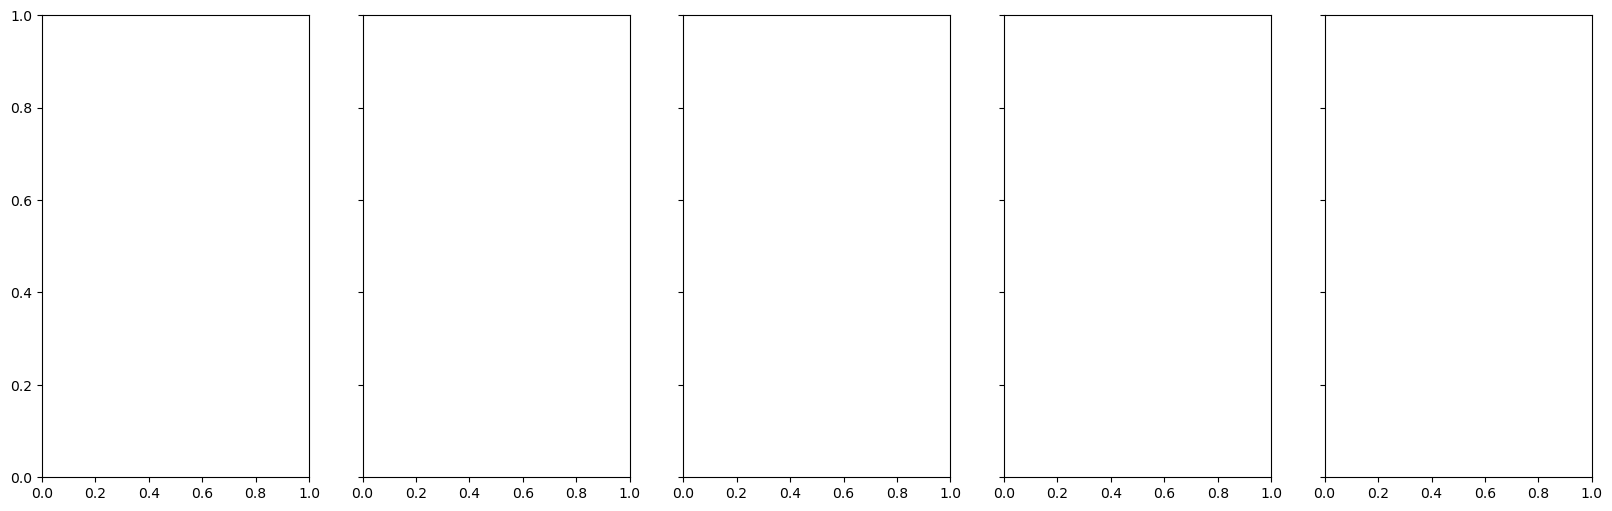

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

years = [2020, 2021, 2022, 2023, 2024]  
dataframes = [_2020, _2021, _2022, _2023, _2024]  

# Create a figure and axis for each year
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)  # 5 subplots in a row

for i, (year, df) in enumerate(zip(years, dataframes)):  
    ride_by_weekday = df.groupby(["member_casual", "week_type"])["ride_id"].count().unstack()
    
    # Convert to DataFrame for line plotting
    ride_by_weekday = ride_by_weekday.reset_index()
    
    # Plot
    sns.lineplot(data=ride_by_weekday, x="week_type", y="ride_id", hue="member_casual", marker="o", ax=axes[i])
    
    axes[i].set_title(f"Year {year}")
    axes[i].set_xlabel("Week Type")
    axes[i].set_ylabel("Ride Count" if i == 0 else "")  # Label only the first y-axis
    axes[i].legend(title="Member Type")

plt.suptitle("Casual vs. Member Rides by Week Type (2020-2024)", fontsize=14)
plt.tight_layout()
plt.show()


In [171]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    ride_by_season = df.groupby(["member_casual", "season"])["ride_id"].count().unstack()
    print(year,ride_by_season)

2020 season           Fall  Spring  Summer  Winter
member_casual                                
casual         461872  110259  710621   29960
member         712901  174133  798878  101062
2021 season            Fall  Spring   Summer  Winter
member_casual                                  
casual          726945  476870  1223586   97773
member         1018873  619499  1130362  295732
2022 season           Fall  Spring   Summer  Winter
member_casual                                 
casual         605182  495475  1131336   84607
member         990965  793272  1244228  316263
2023 season            Fall  Spring   Summer  Winter
member_casual                                  
casual          535469  442483   940481  134316
member         1028225  846158  1314537  469949
2024 season            Fall  Spring   Summer  Winter
member_casual                                  
casual          654660  443947   937341  109568
member         1115953  880215  1274958  435971


In [141]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    avg_duration = df.groupby(["member_casual","rideable_type"])["duration_minutes"].mean()
    print(year,avg_duration)

2020 member_casual  rideable_type
casual         classic_bike     23.334683
               docked_bike      49.471336
               electric_bike    21.487823
member         classic_bike     12.646739
               docked_bike      16.709419
               electric_bike    13.231374
Name: duration_minutes, dtype: float64
2021 member_casual  rideable_type
casual         classic_bike     26.052057
               docked_bike      77.904850
               electric_bike    19.634145
member         classic_bike     13.521337
               docked_bike       2.380000
               electric_bike    12.497641
Name: duration_minutes, dtype: float64
2022 member_casual  rideable_type
casual         classic_bike     24.337113
               docked_bike      50.513609
               electric_bike    15.980806
member         classic_bike     13.125220
               electric_bike    11.268469
Name: duration_minutes, dtype: float64
2023 member_casual  rideable_type
casual         classic_bike     2

In [149]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    avg_duration_max = df.groupby(["member_casual","rideable_type"])["duration_minutes"].max()
    print(year,avg_duration_max)

2020 member_casual  rideable_type
casual         classic_bike      1376.53
               docked_bike      55683.53
               electric_bike      480.00
member         classic_bike      1369.28
               docked_bike      58720.02
               electric_bike      480.01
Name: duration_minutes, dtype: float64
2021 member_casual  rideable_type
casual         classic_bike      1499.56
               docked_bike      55944.09
               electric_bike      487.16
member         classic_bike      1499.56
               docked_bike          2.38
               electric_bike      480.31
Name: duration_minutes, dtype: float64
2022 member_casual  rideable_type
casual         classic_bike      1559.41
               docked_bike      34354.04
               electric_bike      480.26
member         classic_bike      1499.56
               electric_bike      614.24
Name: duration_minutes, dtype: float64
2023 member_casual  rideable_type
casual         classic_bike      1499.57
         

In [153]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    avg_duration_min = df.groupby(["member_casual","rideable_type"])["duration_minutes"].min()
    print(year,avg_duration_min)

2020 member_casual  rideable_type
casual         classic_bike     0.01
               docked_bike      0.01
               electric_bike    0.01
member         classic_bike     0.01
               docked_bike      0.01
               electric_bike    0.01
Name: duration_minutes, dtype: float64
2021 member_casual  rideable_type
casual         classic_bike     0.01
               docked_bike      0.01
               electric_bike    0.01
member         classic_bike     0.01
               docked_bike      2.38
               electric_bike    0.01
Name: duration_minutes, dtype: float64
2022 member_casual  rideable_type
casual         classic_bike     0.01
               docked_bike      0.01
               electric_bike    0.01
member         classic_bike     0.01
               electric_bike    0.01
Name: duration_minutes, dtype: float64
2023 member_casual  rideable_type
casual         classic_bike     0.01
               docked_bike      0.01
               electric_bike    0.01
member 

In [157]:
# Ride validity check
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    validity_check = df.groupby(["member_casual", "ride_validity"])["ride_id"].count().unstack()
    print(year,validity_check)

2020 ride_validity     Fair  Suspicious
member_casual                     
casual         1289840       22872
member         1737434       49540
2021 ride_validity     Fair  Suspicious
member_casual                     
casual         2471675       53499
member         2959041      105425
2022 ride_validity     Fair  Suspicious
member_casual                     
casual         2240313       76287
member         3199305      145423
2023 ride_validity     Fair  Suspicious
member_casual                     
casual         1970093       82656
member         3479505      179364
2024 ride_validity     Fair  Suspicious
member_casual                     
casual         2051514       94002
member         3560151      146946


# Seasonal Analysis
- Compare casual annual trends across different seasons (Spring, Summer, Fall, Winter).
- Detect seasonal peaks and dips (e.g., higher usage in summer vs. lower in winter).
- Use seasonality decomposition (e.g., time series decomposition) to isolate seasonal effects.

## Compare casual annual trends across different seasons (Spring, Summer, Fall, Winter).

In [21]:
# Ride validity check
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    seasonal_trends = df.groupby(["season","member_casual"])["ride_id"].count().reset_index()
    print(year,seasonal_trends)

2020    season member_casual  ride_id
0    Fall        casual   461872
1    Fall        member   712901
2  Spring        casual   110259
3  Spring        member   174133
4  Summer        casual   710621
5  Summer        member   798878
6  Winter        casual    29960
7  Winter        member   101062
2021    season member_casual  ride_id
0    Fall        casual   726945
1    Fall        member  1018873
2  Spring        casual   476870
3  Spring        member   619499
4  Summer        casual  1223586
5  Summer        member  1130362
6  Winter        casual    97773
7  Winter        member   295732
2022    season member_casual  ride_id
0    Fall        casual   605182
1    Fall        member   990965
2  Spring        casual   495475
3  Spring        member   793272
4  Summer        casual  1131336
5  Summer        member  1244228
6  Winter        casual    84607
7  Winter        member   316263
2023    season member_casual  ride_id
0    Fall        casual   535469
1    Fall        member

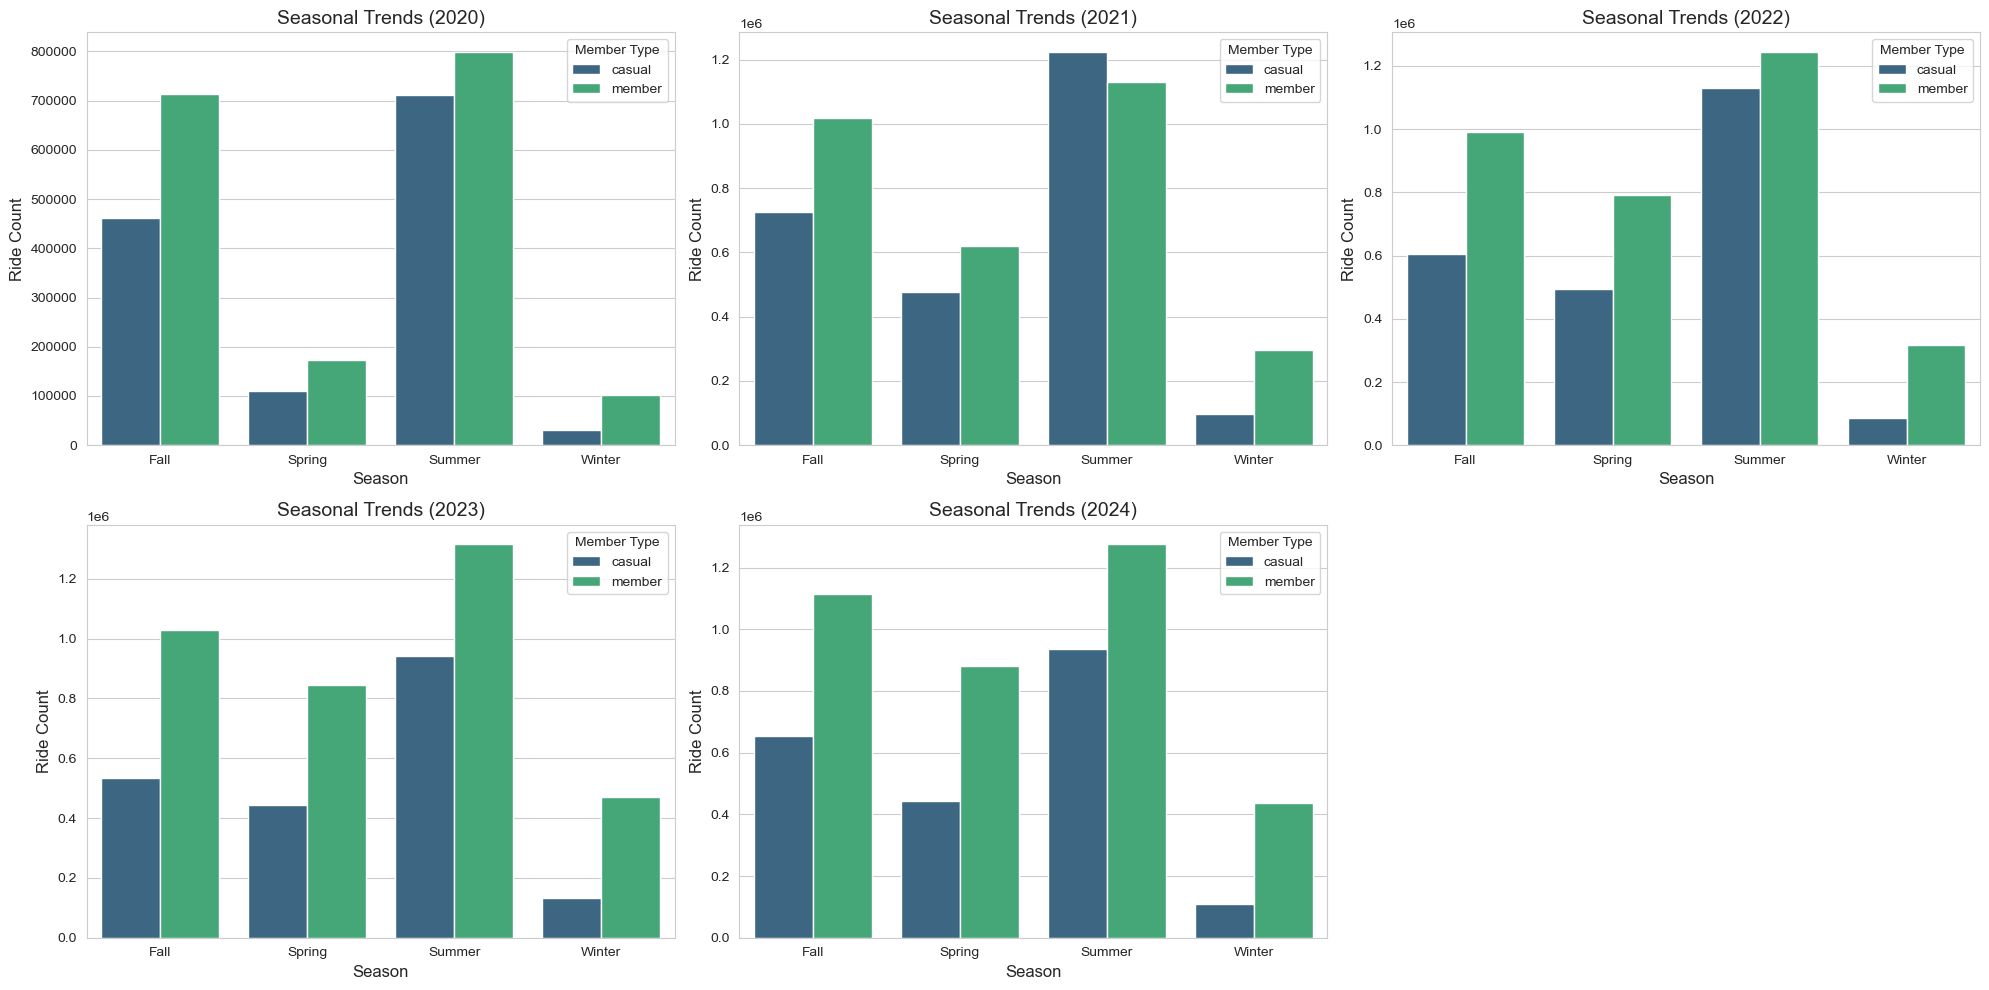

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set_style("whitegrid")

# Define the number of subplots dynamically
num_years = len(years)
cols = 3  # Fixed number of columns
rows = (num_years // cols) + (num_years % cols > 0)  # Calculate required rows dynamically
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))  # Create subplot grid
axes = axes.flatten()  # Flatten the array for easier indexing

# Loop through each year and plot in subplots
for i, (year, df) in enumerate(zip(years, dataframes)):
    if not df.empty:
        # Aggregate ride counts by season and membership type
        seasonal_trends = df.groupby(["season", "member_casual"])["ride_id"].count().reset_index()

        # Create bar plot in subplot
        sns.barplot(ax=axes[i], data=seasonal_trends, x="season", y="ride_id", hue="member_casual", palette="viridis")

        # Add labels and title
        axes[i].set_title(f"Seasonal Trends ({year})", fontsize=14)
        axes[i].set_xlabel("Season", fontsize=12)
        axes[i].set_ylabel("Ride Count", fontsize=12)
        axes[i].legend(title="Member Type")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Deletes extra empty plots

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all subplots
plt.show()


- summer is the peak season for both casual and annual riders for all the years.
- Winter shows the lowest ride activity for both groups.
- Spring and Fall have moderate ride activity.

In [87]:
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    peak_season = seasonal_rides.idxmax()
    dip_season = seasonal_rides.idxmin()
    print(year,peak_season)
    print(year,dip_season)

2020 Summer
2020 Winter
2021 Summer
2021 Winter
2022 Summer
2022 Winter
2023 Summer
2023 Winter
2024 Summer
2024 Winter


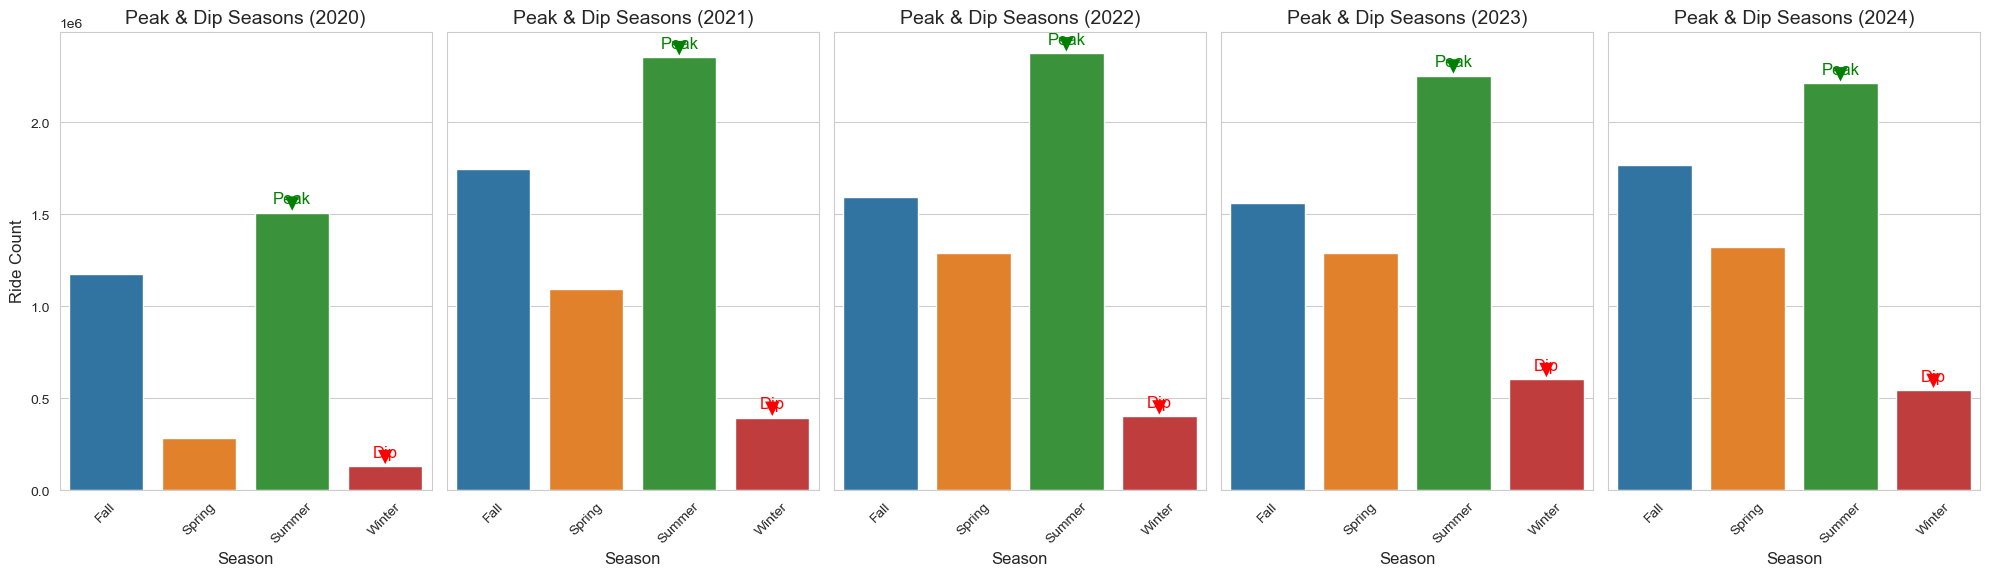

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Define subplot layout
fig, axes = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)

# Loop through each year and create a bar plot
for i, (year, df) in enumerate(zip(years, dataframes)):
    if not df.empty:
        # Aggregate ride counts by season
        seasonal_rides = df.groupby("season")["ride_id"].count()
        
        # Identify peak and dip seasons
        peak_season = seasonal_rides.idxmax()
        dip_season = seasonal_rides.idxmin()

        # Create bar plot
        sns.barplot(ax=axes[i], x=seasonal_rides.index, y=seasonal_rides.values, hue=seasonal_rides.index, legend=False)

        # Add peak and dip annotations
        axes[i].annotate("Peak", xy=(list(seasonal_rides.index).index(peak_season), seasonal_rides.max()), 
                         xytext=(list(seasonal_rides.index).index(peak_season), seasonal_rides.max() + 50000),
                         arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color="green", ha='center')

        axes[i].annotate("Dip", xy=(list(seasonal_rides.index).index(dip_season), seasonal_rides.min()), 
                         xytext=(list(seasonal_rides.index).index(dip_season), seasonal_rides.min() + 50000),
                         arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color="red", ha='center')

        # Set labels and title
        axes[i].set_title(f"Peak & Dip Seasons ({year})", fontsize=14)
        axes[i].set_xlabel("Season", fontsize=12)
        
        # Fix tick labels
        axes[i].set_xticks(range(len(seasonal_rides.index)))
        axes[i].set_xticklabels(seasonal_rides.index, rotation=45)
        
        if i == 0:
            axes[i].set_ylabel("Ride Count", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [99]:
#Aggregate Ride Counts by Month & Season

years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    
    ride_by_member_month = df.groupby(["member_casual", "month_name"])["ride_id"].count()
    print(year,ride_by_member_month)

2020 member_casual  month_name
casual         April          23566
               August        288028
               December       29960
               July          268264
               June          154329
               May            86693
               November       87812
               October       144332
               September     229728
member         April          61054
               August        330529
               December      101062
               July          280638
               June          187711
               May           113079
               November      170733
               October       241906
               September     300262
Name: ride_id, dtype: int64
2021 member_casual  month_name
casual         April         136403
               August        412047
               December       69606
               February       10072
               January        18095
               July          441428
               June          370111
          

In [97]:
#Aggregate Ride Counts by Month & Season

years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):# Iterate over both lists together
    ride_by_member_season = df.groupby(["member_casual", "season"])["ride_id"].count()
    
    print(year,ride_by_member_season)
    

2020 member_casual  season
casual         Fall      461872
               Spring    110259
               Summer    710621
               Winter     29960
member         Fall      712901
               Spring    174133
               Summer    798878
               Winter    101062
Name: ride_id, dtype: int64
2021 member_casual  season
casual         Fall       726945
               Spring     476870
               Summer    1223586
               Winter      97773
member         Fall      1018873
               Spring     619499
               Summer    1130362
               Winter     295732
Name: ride_id, dtype: int64
2022 member_casual  season
casual         Fall       605182
               Spring     495475
               Summer    1131336
               Winter      84607
member         Fall       990965
               Spring     793272
               Summer    1244228
               Winter     316263
Name: ride_id, dtype: int64
2023 member_casual  season
casual         Fall     

In [101]:
# Ride validity check
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    seasonal_trends = df.groupby(["rideable_type","member_casual"])["ride_id"].count().reset_index()
    print(year,seasonal_trends)

2020    rideable_type member_casual  ride_id
0   classic_bike        casual    11288
1   classic_bike        member    59248
2    docked_bike        casual  1092326
3    docked_bike        member  1432357
4  electric_bike        casual   209098
5  electric_bike        member   295369
2021    rideable_type member_casual  ride_id
0   classic_bike        casual  1263331
1   classic_bike        member  1982939
2    docked_bike        casual   312040
3    docked_bike        member        1
4  electric_bike        casual   949803
5  electric_bike        member  1081526
2022    rideable_type member_casual  ride_id
0   classic_bike        casual   888853
1   classic_bike        member  1708993
2    docked_bike        casual   174852
3  electric_bike        casual  1252895
4  electric_bike        member  1635735
2023    rideable_type member_casual  ride_id
0   classic_bike        casual   873096
1   classic_bike        member  1817908
2    docked_bike        casual    76124
3  electric_bike    

In [103]:
_2024['rideable_type'].value_counts()

rideable_type
electric_bike       2979950
classic_bike        2728326
electric_scooter     144337
Name: count, dtype: int64

In [105]:
_2023['rideable_type'].value_counts()

rideable_type
electric_bike    2944490
classic_bike     2691004
docked_bike        76124
Name: count, dtype: int64

In [107]:
_2022['rideable_type'].value_counts()

rideable_type
electric_bike    2888630
classic_bike     2597846
docked_bike       174852
Name: count, dtype: int64

In [109]:
_2021['rideable_type'].value_counts()

rideable_type
classic_bike     3246270
electric_bike    2031329
docked_bike       312041
Name: count, dtype: int64

In [111]:
_2020['rideable_type'].value_counts()

rideable_type
docked_bike      2524683
electric_bike     504467
classic_bike       70536
Name: count, dtype: int64

In [ ]:
# Ride validity check
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    seasonal_trends = df.groupby("season")["member_casual"].count().reset_index()
    print(year,seasonal_trends)

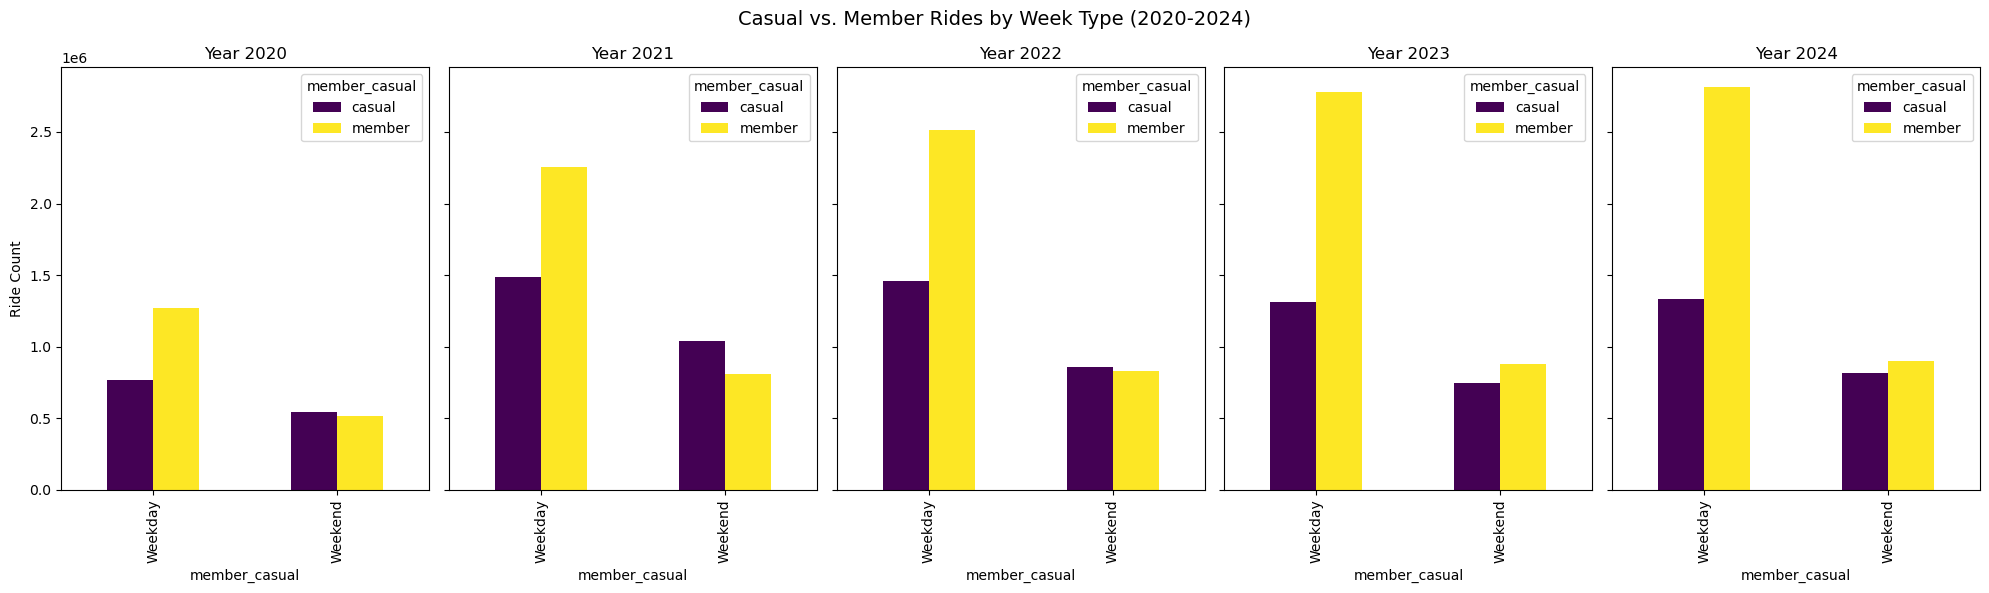

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

years = [2020, 2021, 2022, 2023, 2024]
dataframes = [_2020, _2021, _2022, _2023, _2024]

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)  # 5 subplots in a single row

for i, (year, df) in enumerate(zip(years, dataframes)):
    ride_by_weekday = df.groupby([ "week_type", "member_casual"])["ride_id"].count().unstack()

    # Plot
    ride_by_weekday.plot(kind="bar", ax=axes[i], colormap="viridis")
    axes[i].set_title(f"Year {year}")
    axes[i].set_xlabel("member_casual")
    axes[i].set_ylabel("Ride Count" if i == 0 else "")  # Only label y-axis for the first subplot
    axes[i].legend(title="member_casual", loc="upper right")

plt.suptitle("Casual vs. Member Rides by Week Type (2020-2024)", fontsize=14)
plt.tight_layout()
plt.show()


## Members Dominate on Weekdays
###### In all years (2020-2024), member riders have significantly higher ride counts on weekdays than casual riders.
- This suggests that annual members likely use bike-sharing for commuting to work or daily routines.
- 2️⃣ Casual Riders Prefer Weekends
- Casual riders' ride counts are more balanced across weekdays and weekends, compared to members.
- This indicates that casual riders may use bike-sharing more for leisure or recreational purposes.
- 3️⃣ Growth in Membership Usage Over Time
- The yellow bars (members) on weekdays increase from 2020 to 2024, suggesting:
- More people are subscribing to annual memberships.
- Bike-sharing is becoming a more common mode of transportation.
- 4️⃣ Casual Rides Are Consistently Lower on Weekdays
- The purple bars (casual riders) remain lower on weekdays across all years.
- This suggests that non-members rely on bike-sharing less for daily commutes.
- 5️⃣ Weekend Trends Are More Stable
- Both casual and member rides remain relatively steady on weekends over the years.
- This could indicate a steady pattern of leisure and recreational rides over time.

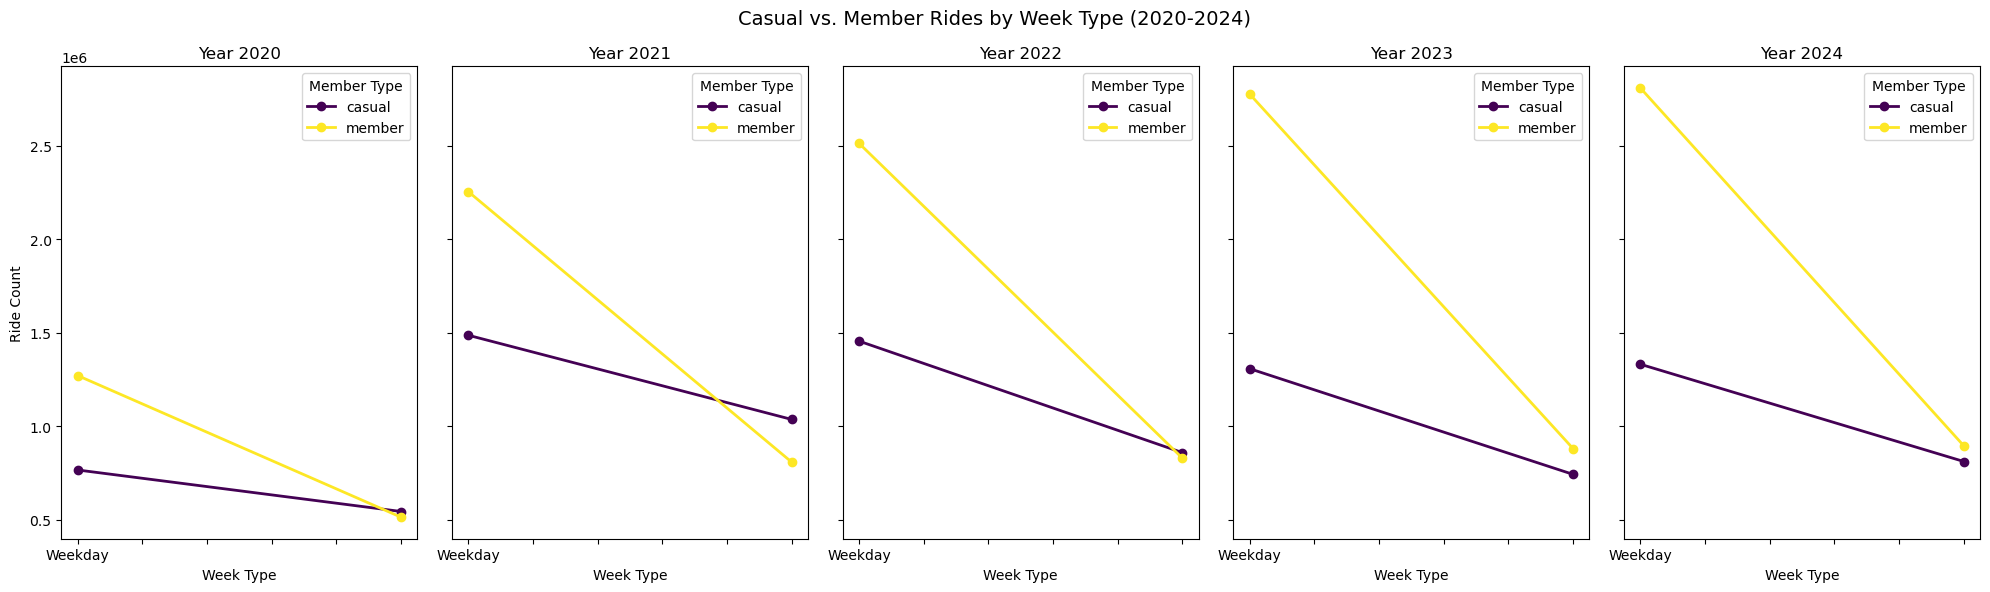

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define years and corresponding DataFrames
years = [2020, 2021, 2022, 2023, 2024]
dataframes = [_2020, _2021, _2022, _2023, _2024]

# Create a figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)  # 5 subplots in a single row

for i, (year, df) in enumerate(zip(years, dataframes)):
    ride_by_weekday = df.groupby(["week_type", "member_casual"])["ride_id"].count().unstack()

    # Plot line graph
    ride_by_weekday.plot(kind="line", marker="o", ax=axes[i], colormap="viridis", linewidth=2)

    # Set titles and labels
    axes[i].set_title(f"Year {year}")
    axes[i].set_xlabel("Week Type")
    axes[i].set_ylabel("Ride Count" if i == 0 else "")  # Y-axis label only for first plot
    axes[i].legend(title="Member Type", loc="upper right")

# Set the overall title
plt.suptitle("Casual vs. Member Rides by Week Type (2020-2024)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define years and corresponding DataFrames
years = [2020, 2021, 2022, 2023, 2024]
dataframes = [_2020, _2021, _2022, _2023, _2024]

# Create a figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)  # 5 subplots in a single row

for i, (year, df) in enumerate(zip(years, dataframes)):
    ride_by_weekday = df.groupby(["week_type", "member_casual"])["ride_id"].count().unstack()

    # Plot line graph
    ride_by_weekday.plot(kind="line", marker="o", ax=axes[i], colormap="viridis", linewidth=2)

    # Set titles and labels
    axes[i].set_title(f"Year {year}")
    axes[i].set_xlabel("Week Type")
    axes[i].set_ylabel("Ride Count" if i == 0 else "")  # Y-axis label only for first plot
    axes[i].legend(title="Member Type", loc="upper right")

# Set the overall title
plt.suptitle("Casual vs. Member Rides by Week Type (2020-2024)", fontsize=14)
plt.tight_layout()
plt.show()


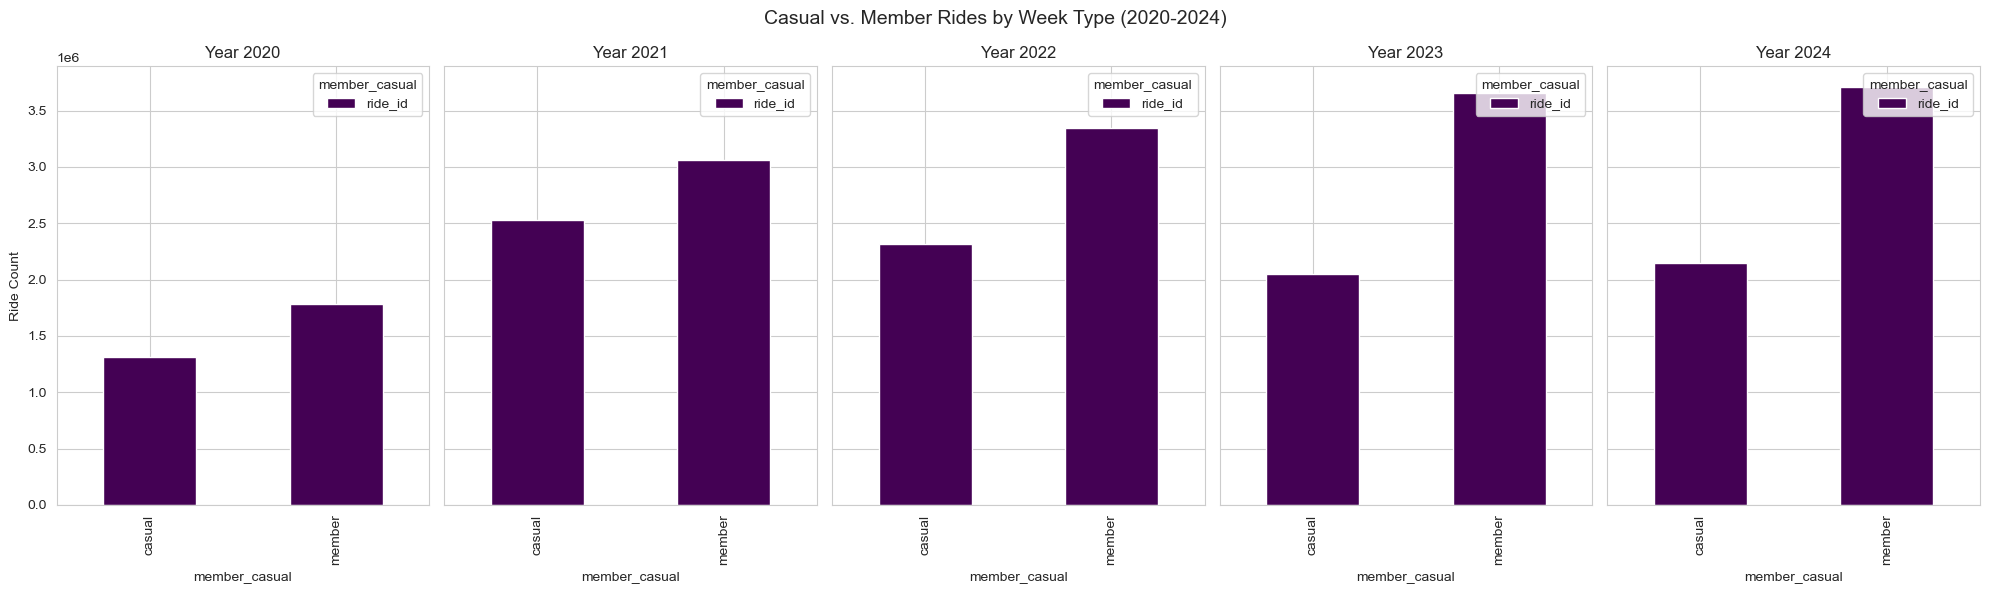

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

years = [2020, 2021, 2022, 2023, 2024]
dataframes = [_2020, _2021, _2022, _2023, _2024]

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)  # 5 subplots in a single row

for i, (year, df) in enumerate(zip(years, dataframes)):
    ride_by_weekday = df.groupby( "member_casual")["ride_id"].count()

    # Plot
    ride_by_weekday.plot(kind="bar", ax=axes[i], colormap="viridis")
    axes[i].set_title(f"Year {year}")
    axes[i].set_xlabel("member_casual")
    axes[i].set_ylabel("Ride Count" if i == 0 else "")  # Only label y-axis for the first subplot
    axes[i].legend(title="member_casual", loc="upper right")

plt.suptitle("Casual vs. Member Rides by Week Type (2020-2024)", fontsize=14)
plt.tight_layout()
plt.show()

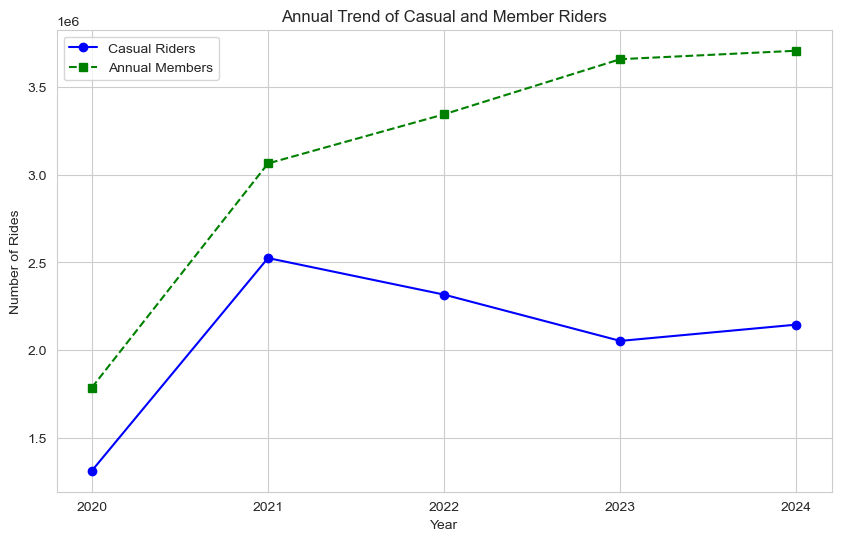

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# List of years and corresponding DataFrames
years = [2020, 2021, 2022, 2023, 2024]
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Replace with actual DataFrame names

# Create dictionaries to store yearly ride counts
casual_rides_per_year = {}
member_rides_per_year = {}

# Loop through each year and count rides for casual and member
for year, df in zip(years, dataframes):
    casual_count = df[df["member_casual"] == "casual"]["ride_id"].count()
    member_count = df[df["member_casual"] == "member"]["ride_id"].count()

    casual_rides_per_year[year] = casual_count
    member_rides_per_year[year] = member_count

# Convert dictionaries to DataFrames
rides_df = pd.DataFrame({
    "Year": years,
    "Casual Rides": [casual_rides_per_year[year] for year in years],
    "Member Rides": [member_rides_per_year[year] for year in years]
})

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(rides_df["Year"], rides_df["Casual Rides"], marker="o", linestyle="-", color="b", label="Casual Riders")
plt.plot(rides_df["Year"], rides_df["Member Rides"], marker="s", linestyle="--", color="g", label="Annual Members")

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Number of Rides")
plt.title("Annual Trend of Casual and Member Riders")
plt.xticks(years)  # Ensure x-axis has correct years
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [181]:
# Ride validity check
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

for year, df in zip(years, dataframes):  # Iterate over both lists together
    
    annual_casual_counts = df['member_casual'].value_counts()
    print(years,annual_casual_counts)

[2020, 2021, 2022, 2023, 2024] member_casual
member    1786974
casual    1312712
Name: count, dtype: int64
[2020, 2021, 2022, 2023, 2024] member_casual
member    3064466
casual    2525174
Name: count, dtype: int64
[2020, 2021, 2022, 2023, 2024] member_casual
member    3344728
casual    2316600
Name: count, dtype: int64
[2020, 2021, 2022, 2023, 2024] member_casual
member    3658869
casual    2052749
Name: count, dtype: int64
[2020, 2021, 2022, 2023, 2024] member_casual
member    3707097
casual    2145516
Name: count, dtype: int64


2020 member_casual
member    1786974
casual    1312712
Name: count, dtype: int64
2021 member_casual
member    3064466
casual    2525174
Name: count, dtype: int64
2022 member_casual
member    3344728
casual    2316600
Name: count, dtype: int64
2023 member_casual
member    3658869
casual    2052749
Name: count, dtype: int64
2024 member_casual
member    3707097
casual    2145516
Name: count, dtype: int64


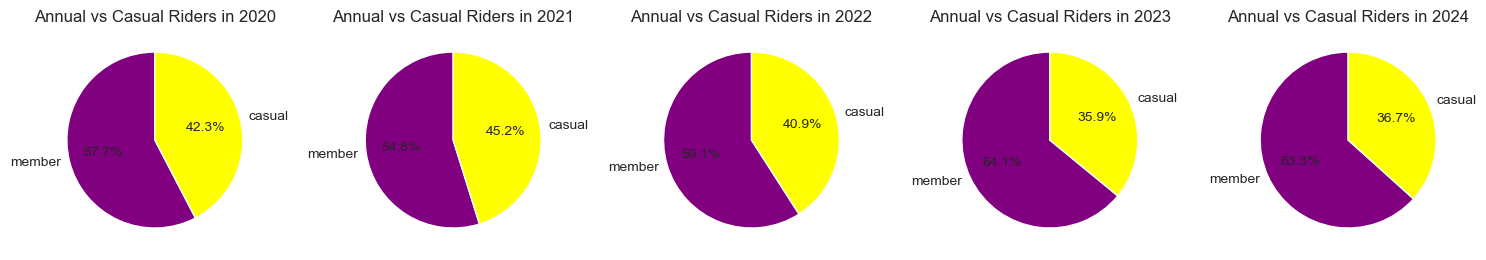

In [189]:
# Ride validity check
years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

fig, axes = plt.subplots(1, len(years), figsize=(15, 6))

total_records = [len(df) for df in dataframes]  # Get total records per year

for ax, (year, df, total) in zip(axes, zip(years, dataframes, total_records)):  # Iterate over both lists together
    annual_casual_counts = df['member_casual'].value_counts()
    print(year, annual_casual_counts)
    
    # Normalize by total records
    annual_casual_counts = (annual_casual_counts / total) * 100  # Convert to percentage
    
    # Draw pie chart
    annual_casual_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=['purple', 'yellow'])
    ax.set_title(f'Annual vs Casual Riders in {year}')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

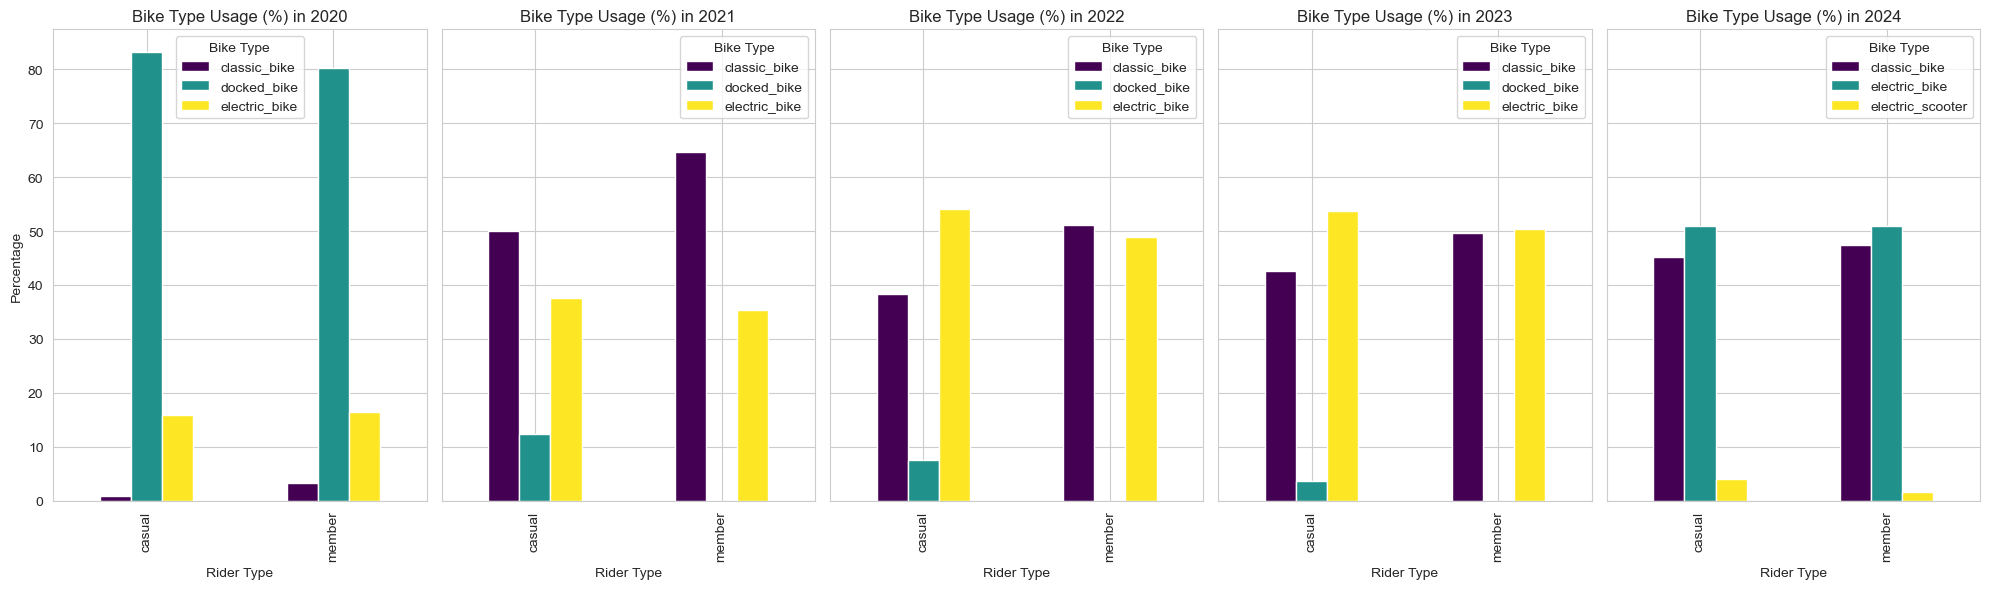

In [205]:
import matplotlib.pyplot as plt
import pandas as pd

years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

fig, axes = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)

for ax, (year, df) in zip(axes, zip(years, dataframes)):  
    if df.empty:
        ax.set_title(f'No Data for {year}')
        ax.axis('off')
        continue
    
    # Group by 'member_casual' and 'rideable_type', then normalize within 'member_casual'
    ride_counts = df.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
    ride_percentages = ride_counts.div(ride_counts.sum(axis=1), axis=0) * 100  # Normalize per rider type
    
    # Plot
    ride_percentages.plot(kind='bar', stacked=False, ax=ax, colormap='viridis')
    
    ax.set_title(f'Bike Type Usage (%) in {year}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Rider Type')
    ax.legend(title='Bike Type')

plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

# Create a dictionary to store rideable type percentages over the years
ride_trends = {}

for year, df in zip(years, dataframes):  
    if df.empty:
        continue  # Skip empty DataFrames
    
    # Group by 'member_casual' and 'rideable_type', then normalize within 'member_casual'
    ride_counts = df.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
    ride_percentages = ride_counts.div(ride_counts.sum(axis=1), axis=0) * 100  # Normalize per rider type
    
    for ride_type in ride_percentages.columns:
        if ride_type not in ride_trends:
            ride_trends[ride_type] = {"member": [], "casual": []}
        
        ride_trends[ride_type]["member"].append(ride_percentages.loc['member', ride_type] if 'member' in ride_percentages.index else 0)
        ride_trends[ride_type]["casual"].append(ride_percentages.loc['casual', ride_type] if 'casual' in ride_percentages.index else 0)

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))

for ride_type, percentages in ride_trends.items():
    ax.plot(years, percentages['member'], marker='o', linestyle='-', label=f'{ride_type} (Member)')
    ax.plot(years, percentages['casual'], marker='s', linestyle='--', label=f'{ride_type} (Casual)')

ax.set_title('Bike Type Usage Trend (%) Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.legend(title='Bike Type & Rider Type')
ax.grid(True)

plt.show()


NameError: name '_2020' is not defined

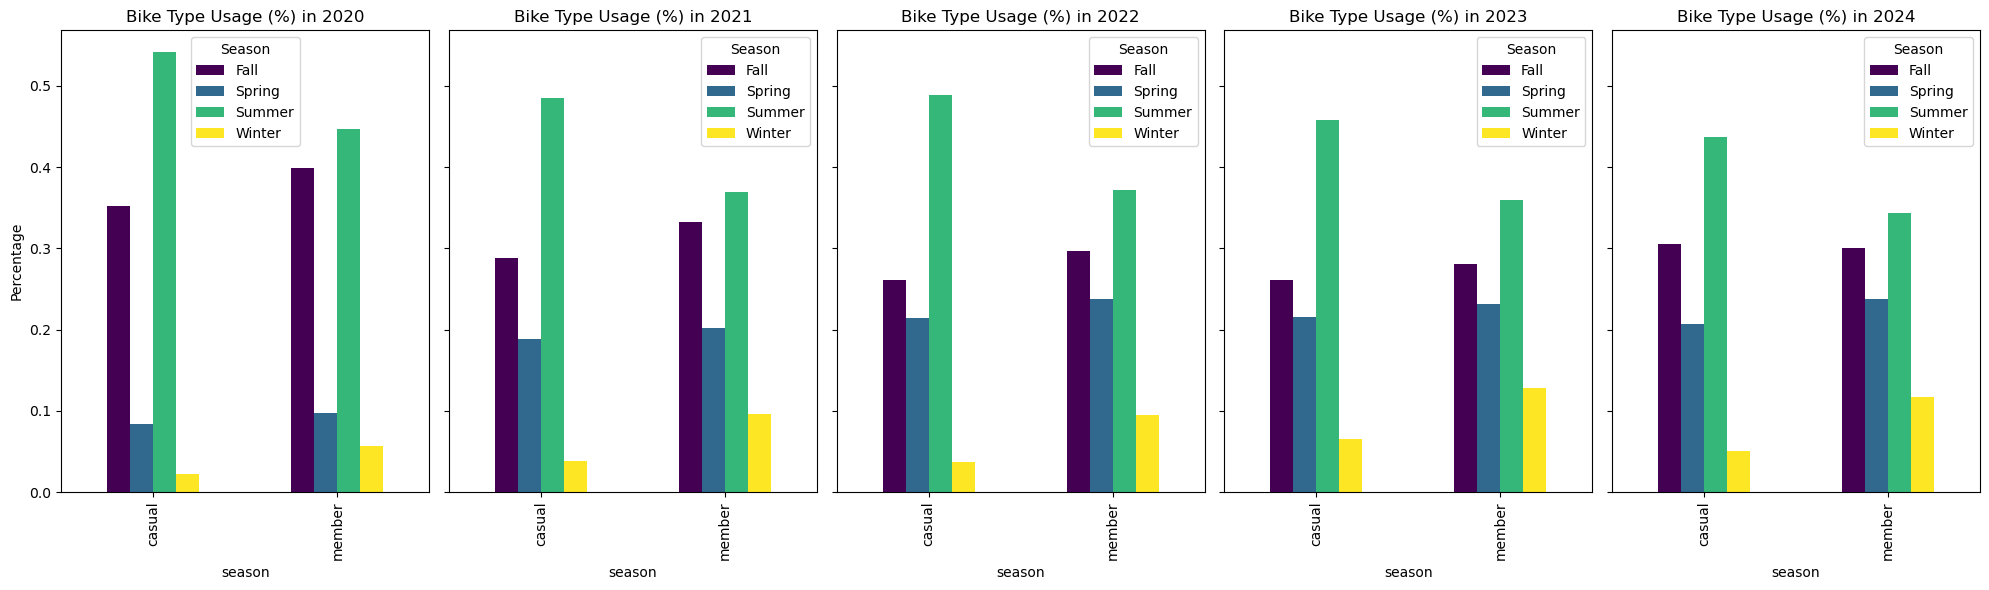

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

fig, axes = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)

for ax, (year, df) in zip(axes, zip(years, dataframes)):  
    if df.empty:
        ax.set_title(f'No Data for {year}')
        ax.axis('off')
        continue
    
    # Group by 'member_casual' and 'rideable_type', then normalize within 'member_casual'
    ride_counts = df.groupby(['member_casual', 'season']).size().unstack(fill_value=0)
    ride_percentages = ride_counts.div(ride_counts.sum(axis=1), axis=0) # Normalize per rider type
    
    # Plot
    ride_percentages.plot(kind='bar', stacked=False, ax=ax, colormap='viridis')
    
    ax.set_title(f'Bike Type Usage (%) in {year}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('season')
    ax.legend(title='Season')

plt.tight_layout()
plt.show()

In [203]:
ride_counts = df.groupby(['member_casual'])

In [ ]:
  ride_counts = df.groupby(['season', 'member_casual', 'rideable_type']).size().unstack(fill_value=0)

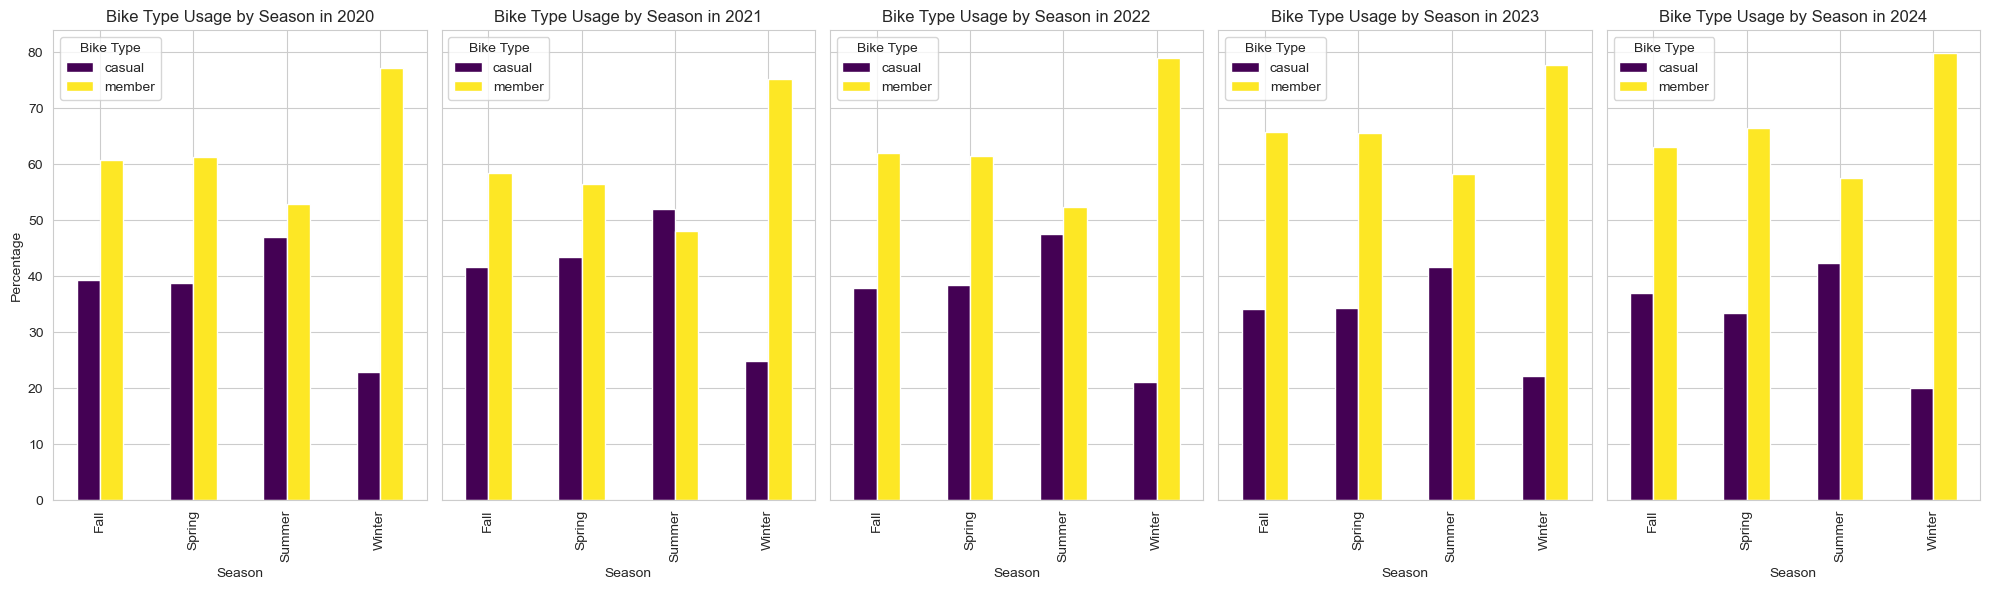

In [216]:
import matplotlib.pyplot as plt
import pandas as pd

years = [2020, 2021, 2022, 2023, 2024]  # List of years
dataframes = [_2020, _2021, _2022, _2023, _2024]  # Corresponding DataFrames

fig, axes = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)

for ax, (year, df) in zip(axes, zip(years, dataframes)):  
    if df.empty:
        ax.set_title(f'No Data for {year}')
        ax.axis('off')
        continue
    
    # Group by 'season', 'member_casual', and 'rideable_type'
    ride_counts = df.groupby(['season', 'member_casual']).size().unstack(fill_value=0)
    
    # Normalize within each season to get percentages
    ride_percentages = ride_counts.div(ride_counts.sum(axis=1), axis=0) * 100  

    # Plot grouped bar chart (not stacked for better comparison)
    ride_percentages.plot(kind='bar', stacked=False, ax=ax, colormap='viridis')

    ax.set_title(f'Bike Type Usage by Season in {year}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Season')
    ax.legend(title='Bike Type')

plt.tight_layout()
plt.show()



In [123]:
_2020.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'ride_validity', 'day_period',
       'month_name', 'season', 'weekday', 'week_type', 'duration_seconds',
       'duration_minutes', 'total_hours'],
      dtype='object')

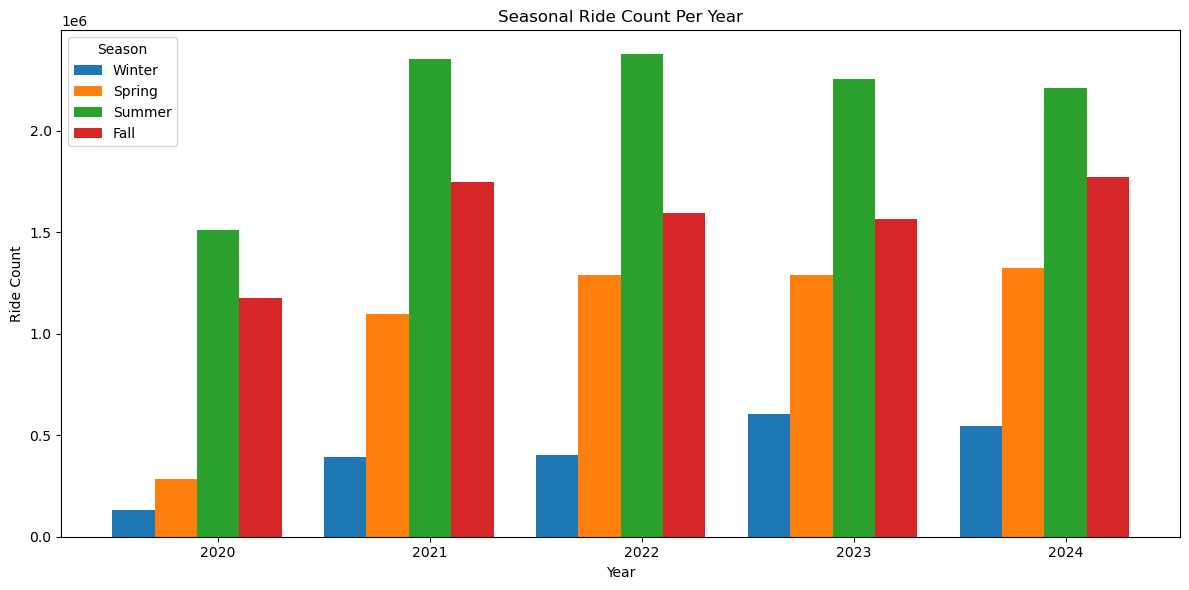

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

years = [2020, 2021, 2022, 2023, 2024]  
dataframes = [_2020, _2021, _2022, _2023, _2024]  

# Collect data for plotting
season_labels = ["Winter", "Spring", "Summer", "Fall"]
season_data = {season: [] for season in season_labels}  # Dictionary to store counts

for year, df in zip(years, dataframes):
    ride_by_season = df.groupby("season")["ride_id"].count()
    
    # Store counts in the dictionary, ensuring all seasons are represented
    for season in season_labels:
        season_data[season].append(ride_by_season.get(season, 0))  # Get count, default 0 if missing

# Plot grouped bar chart
bar_width = 0.2  # Width of each bar
x_indexes = np.arange(len(years))  # X-axis positions

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each season
for i, season in enumerate(season_labels):
    ax.bar(x_indexes + i * bar_width, season_data[season], width=bar_width, label=season)

# Formatting the plot
ax.set_xticks(x_indexes + bar_width * (len(season_labels) / 2))
ax.set_xticklabels(years)
ax.set_ylabel("Ride Count")
ax.set_xlabel("Year")
ax.set_title("Seasonal Ride Count Per Year")
ax.legend(title="Season")

plt.tight_layout()
plt.show()


How Divvy Tracks Battery Levels
- 1️⃣ GPS & IoT Sensors 📡
- Every electric bike has built-in GPS & IoT sensors that constantly send data to Divvy’s system.
- This data includes battery percentage, location, usage trends, and docking status.

- 2️⃣ Real-Time Battery Monitoring ⚡
- Divvy's backend system tracks battery levels remotely.
- If a bike’s battery drops below a set threshold, it gets flagged for service.

- 3️⃣ Automated Alerts & Dispatching 🚛
- When a bike needs charging, the system automatically notifies Divvy’s operations team.
- Divvy staff use electric vans to locate and swap low-battery bikes.
- Fresh, fully charged batteries are inserted, and the e-bike is back in service.

- 4️⃣ Swappable Battery System 🔋
- Unlike classic docked bikes, Divvy e-bikes use removable batteries.
- Staff don’t need to transport the whole bike—just swap the battery in seconds!

A GPS (Global Positioning System) is a satellite-based navigation system that helps track locations anywhere on Earth. It works using signals from multiple satellites to determine an object’s exact position, speed, and movement.

- How Divvy Uses GPS for Operations
📍 Tracking bike locations – Helps users find nearby bikes on the app
🔋 Battery monitoring – Alerts staff when an e-bike needs charging
🔄 Rebalancing bikes – Moves bikes to high-demand areas
🚨 Security & theft prevention – Detects if a bike is left in an unauthorized area
 
 
 
 
- How GPS Works in Divvy Bikes
Divvy e-bikes have a built-in GPS module that:
✅ Sends real-time location data to Divvy’s servers
✅ Tracks battery level, ride duration, and movement
✅ Helps staff find lost or misplaced bikes
✅ Monitors where bikes are most used for better distribution